# Introduction


This project investigates whether there is a correlation between the economic output of a country and the life expectancy of its citizens.

The objectives are to prepare the data, followed by a graphical analysis, and try to explain the findings of the study.

Here are some questions this project will try to answer:

+ 1) Has life expectancy increased over time in the six nations?
+ 2) Has GDP increased over time in the six nations?
+ 3) Is there a correlation between GDP and life expectancy of a country?
+ 4) What is the average life expectancy in these nations?
+ 5) What is the distribution of that life expectancy?




## Import Python Modules



In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Another check of the shape of `df` is performed. It seems that there are 96 observations or rows and 4 columns. 

## Explore the Data

First, more needs to be explored about the countries that are represented in `df`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find out which years are represented in the data, and they are 2000-2015.

In [5]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Has life expectancy increased over time in the six nations?

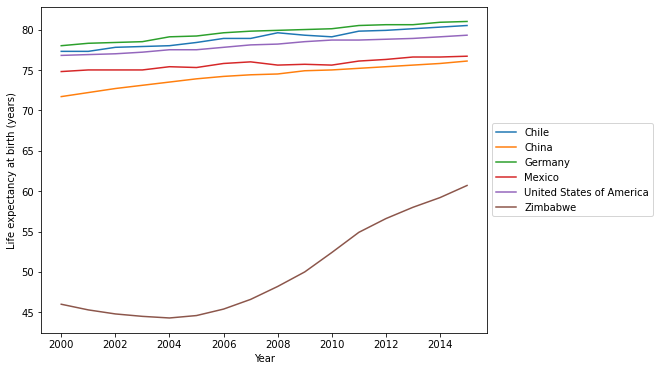

In [6]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df["Life expectancy at birth (years)"], hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

In [7]:
# This code snippet allows you to extract data from one data frame to create another from scratch.
list1 = []
list2 = []
list3 = []
list4 = []

# for loop that iterates through a list containing the names of all the countries.
# df1, returns the value of "Life expentancy at birth (years)" when the year is equal to 2000 and the name of the country at that moment of the iteration.
# df2, same as above only for the year 2014.
# df11, df1 is a data frame, with an index column and Life expectancy at birth (years), 1st Delete the index column, 2nd Get only the value, 3rd Convert to a float value.
# df22, same as above only for the year 2014.
# dif_2000_2014, get the incremental percentage of life expectancy.


for i in df.Country.unique(): 
    df1 = df["Life expectancy at birth (years)"][df["Year"] == 2000][df["Country"] == i].reset_index()
    df2 = df["Life expectancy at birth (years)"][df["Year"] == 2014][df["Country"] == i].reset_index()
    df11 = (float(df1["Life expectancy at birth (years)"].values))
    df22 = (float(df2["Life expectancy at birth (years)"].values))
    list1.append(i)
    list2.append(df11)
    list3.append(df22)
    dif_2000_2014 = (round(((df22 - df11)*100)/df11))
    list4.append(dif_2000_2014)
    
# Start a data frame from the lists created with the for loop.
df3 = pd.DataFrame([list2,list3,list4],columns=list1)

# A new column is created and inserted in the existing DF in order to function as an index.
df3["Year"] = [2000, 2014, "Increase (%)"]

# shift column 'Year' to first position
first_column = df3.pop("Year")
  
# insert column using insert(position,column_name,first_column) function
df3.insert(0, 'Year', first_column)
  
print(df3)

           Year  Chile  China  Germany  Mexico  United States of America  \
0          2000   77.3   71.7     78.0    74.8                      76.8   
1          2014   80.3   75.8     80.9    76.6                      79.1   
2  Increase (%)    4.0    6.0      4.0     2.0                       3.0   

   Zimbabwe  
0      46.0  
1      59.2  
2      29.0  


We can see in the line graph that life expectancy has increased in all countries, the data frame confirms the same where the country that has significantly increased life expectancy has been Zimbabwe.

2) Has GDP increased over time in the six nations?

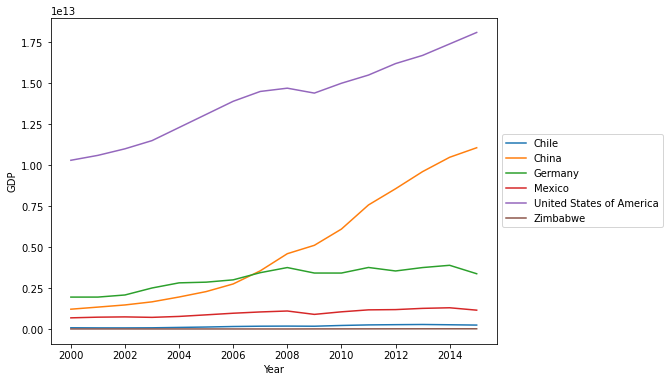

In [8]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df["GDP"], hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP");

In [9]:
# This code snippet allows you to extract data from one data frame to create another from scratch.
list1 = []
list2 = []
list3 = []
list4 = []

# for loop that iterates through a list containing the names of all the countries.
# df1, returns the value of "GDP" when the year is equal to 2000 and the name of the country at that moment of the iteration.
# df2, same as above only for the year 2014.
# df11, df1 is a data frame, with an index column and GDP, 1st Delete the index column, 2nd Get only the value, 3rd Convert to a float value.
# df22, same as above only for the year 2014.
# dif_2000_2014, get the incremental percentage of GDP.


for i in df.Country.unique(): 
    df1 = df["GDP"][df["Year"] == 2000][df["Country"] == i].reset_index()
    df2 = df["GDP"][df["Year"] == 2014][df["Country"] == i].reset_index()
    df11 = (float(df1["GDP"].values))
    df22 = (float(df2["GDP"].values))
    list1.append(i)
    list2.append(df11)
    list3.append(df22)
    dif_2000_2014 = (round(((df22 - df11)*100)/df11))
    list4.append(dif_2000_2014)
    
# Start a data frame from the lists created with the for loop.
df3 = pd.DataFrame([list2,list3,list4],columns=list1)

# A new column is created and inserted in the existing DF in order to function as an index.
df3["Year"] = [2000, 2014, "Increase (%)"]

# shift column 'Year' to first position
first_column = df3.pop("Year")
  
# insert column using insert(position,column_name,first_column) function
df3.insert(0, 'Year', first_column)
  
print(df3)

           Year         Chile         China       Germany        Mexico  \
0          2000  7.786093e+10  1.211350e+12  1.949950e+12  6.836480e+11   
1          2014  2.609900e+11  1.048240e+13  3.890610e+12  1.298460e+12   
2  Increase (%)  2.350000e+02  7.650000e+02  1.000000e+02  9.000000e+01   

   United States of America      Zimbabwe  
0              1.030000e+13  6.689958e+09  
1              1.740000e+13  1.589105e+10  
2              6.900000e+01  1.380000e+02  


We can see from the line graph that GDP has increased in all countries, the data frame confirms the same where the country that has significantly increased life expectancy has been China.

3) Is there a correlation between GDP and life expectancy of a country?

Essentially, correlation is the measure of how two or more variables are related to one another. Although in the broadest sense, "correlation" may indicate any type of association, in statistics it normally refers to the degree to which a pair of variables are linearly related. The most common of these is the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables (which may be present even when one variable is a nonlinear function of the other). https://en.wikipedia.org/wiki/Correlation

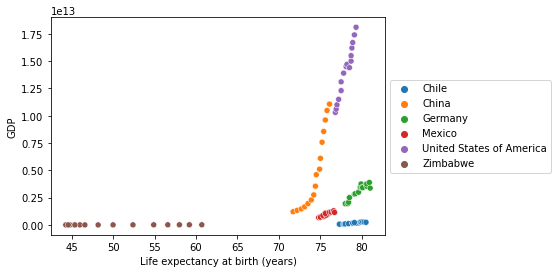

In [10]:
sns.scatterplot(x=df["Life expectancy at birth (years)"], y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);


In statistics, the Pearson correlation coefficient is a measure of linear correlation between two sets of data. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations. A value equal to +- 0.3 indicates a linear association between variables, greater than +- 0.6 indicates a strong linear association. A scatter plot between two variables in which the result is a line of perfectly aligned points at 45º will give a Pearsons coefficient equal to 1 (the maximum possible).

In [11]:
# Calculate correlation
from scipy.stats import pearsonr
for i in df.Country.unique(): 
    correlation, p = pearsonr(df["Life expectancy at birth (years)"][df["Country"] == i], df.GDP[df["Country"] == i])
    print("correlation " + i +" :" , round(correlation, 2))

correlation Chile : 0.95
correlation China : 0.91
correlation Germany : 0.93
correlation Mexico : 0.93
correlation United States of America : 0.98
correlation Zimbabwe : 0.97


All countries show a strong correlation between GDP and life expectancy (+0.6), although this value is not a perfect indicator, since we see a non-linear relationship in the graphs.

4) What is the average life expectancy in these nations?

In [16]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print("Means 2000_2014")
display(dfMeans)

Means 2000_2014


,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


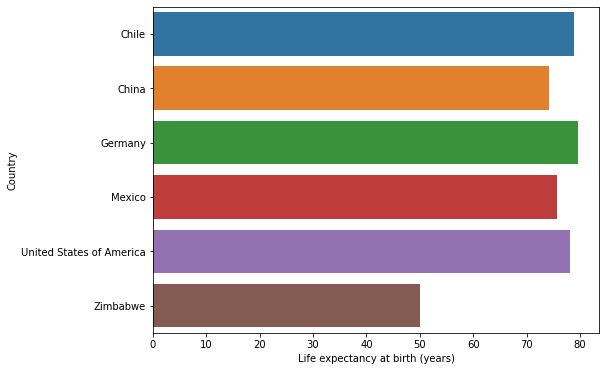

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

The average life expectancy from 2000 to 2014 is between 70 and 80 years for all countries, with the exception of Zimbabwe, which is between 40 and 50 years.

5) What is the distribution of that life expectancy?

<Figure size 1152x864 with 0 Axes>

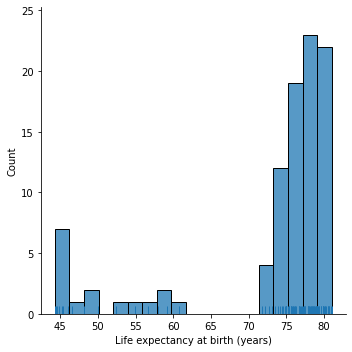

In [49]:
plt.figure(figsize=(16,12))
sns.displot(df["Life expectancy at birth (years)"], rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");
plt.show()

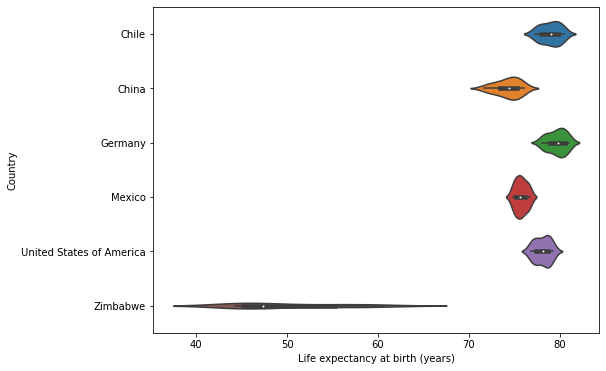

In [41]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df["Life expectancy at birth (years)"], x=df["Life expectancy at birth (years)"], y=df["Country"])
plt.show()

The distribution of life expectancy from 2000 to 2014 has changed a lot for Zimbabwe, going from 45 years in 2004 to 60 in 2014. That is why we see a very extended violin plot, the median (white dot) is on the below 50. Then China is the second country that has experienced a major change in life expectancy. In general, the rest of the countries have been very stable, although they have experienced increases in this value.

## Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)